## ILThermoPy CookBook

ILThermo 2.0 is the biggest curated database, containing a wide varieties of experimental data on ionic liquids. This cookbook shows how this database can be accessed in automatic mode via the ILThermoPy package.

### Basic search

Functionality of ILThermo 2.0 allows one to search experimental data on ionic liquids by the name/CAS RN/chemical formula of compounds, number of components, measured property, and parameters of the source article (for more details see the description of the `ilt.Search` function):

In [1]:
# relative import from the project's root
import sys, os
sys.path.insert(0, os.path.abspath('../../'))

import ilthermopy as ilt

help(ilt.Search)

Help on function Search in module ilthermopy.search:

Search(compound: Union[str, NoneType] = None, n_compounds: Literal[None, 1, 2, 3] = None, prop: Union[str, NoneType] = None, prop_key: Union[str, NoneType] = None, year: Union[int, NoneType] = None, author: Union[str, NoneType] = None, keywords: Union[str, NoneType] = None) -> pandas.core.frame.DataFrame
    Runs ILThermo search and returns results as a dataframe
    
    Arguments:
        compound: chemical formula, CAS registry number, or name (part or full)
        n_compounds: number of mixture compounds
        prop: name of physico-chemical property, only used if prop_key is not specified
        prop_key: key of physico-chemical property (view available via GetPropertyList)
        year: publication year
        author: author's last name
        keywords: keywords presumably specified in paper's title
    
    Returns:
        dataframe containing main info on found entries



In [2]:
# search individual compounds published in 2004
df = ilt.Search(n_compounds = 1, year = 2004)
df

,id,reference,property,phases,num_phases,num_components,num_data_points,cmp1,cmp1_id,cmp1_smiles,cmp2,cmp2_id,cmp2_smiles,cmp3,cmp3_id,cmp3_smiles
0,GDAPc,Kabo et al. (2004),Heat capacity at constant pressure,Liquid,1,1,1528,1-butyl-3-methylimidazolium hexafluorophosphate,ABChct,CCCC[n+]1ccn(C)c1.F[P-](F)(F)(F)(F)F,None,None,None,None,None,None
1,ExsAE,Kabo et al. (2004),Heat capacity at vapor saturation pressure,Crystal;Gas,2,1,137,1-butyl-3-methylimidazolium hexafluorophosphate,ABChct,CCCC[n+]1ccn(C)c1.F[P-](F)(F)(F)(F)F,None,None,None,None,None,None
2,qrMCo,Kabo et al. (2004),Heat capacity at vapor saturation pressure,Glass;Gas,2,1,111,1-butyl-3-methylimidazolium hexafluorophosphate,ABChct,CCCC[n+]1ccn(C)c1.F[P-](F)(F)(F)(F)F,None,None,None,None,None,None
3,uMfAK,Sun et al. (2004),Heat capacity at constant pressure,Crystal,1,1,111,"4,6-dimethyl-N-phenylpyrimidin-2-amine dodecan...",ABYryg,CCCCCCCCCCCC(=O)[O-].Cc1cc(C)nc(Nc2ccccc2)[nH+]1,None,None,None,None,None,None
4,tITzw,Kabo et al. (2004),Heat capacity at vapor saturation pressure,Liquid;Gas,2,1,42,1-butyl-3-methylimidazolium hexafluorophosphate,ABChct,CCCC[n+]1ccn(C)c1.F[P-](F)(F)(F)(F)F,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,cymsK,Zhao et al. (2004b),Viscosity,Liquid,1,1,1,1-(4-cyanobutyl)-3-methylimidazolium tetrafluo...,AAwOad,Cn1cc[n+](CCCCC#N)c1.F[B-](F)(F)F,None,None,None,None,None,None
273,aZyHd,Zhao et al. (2004b),Density,Liquid,1,1,1,1-butyl-3-methylimidazolium hexafluorophosphate,ABChct,CCCC[n+]1ccn(C)c1.F[P-](F)(F)(F)(F)F,None,None,None,None,None,None
274,qGNfU,Zhao et al. (2004b),Viscosity,Liquid,1,1,1,1-butyl-3-methylimidazolium hexafluorophosphate,ABChct,CCCC[n+]1ccn(C)c1.F[P-](F)(F)(F)(F)F,None,None,None,None,None,None
275,WbDYd,Zhao et al. (2004b),Density,Liquid,1,1,1,1-butyl-3-methylimidazolium tetrafluoroborate,AArYmU,CCCC[n+]1ccn(C)c1.F[B-](F)(F)F,None,None,None,None,None,None


Output dataframe contains main information for each found entry, namely:

- **id**: ILThermo entry ID, can be used to retrieve data via `ilt.GetEntry` function;

- **reference**: short notation of the source paper;

- **property**: measured property;

- **phases**: semicolon-separated list of the system's phases;

- **num_phases**, **num_components**, **num_data_points**: number of system's components and phases, and number of measured data points;
- **cmp**, **cmp_id**, **cmp_smiles**: compound name, ILThermo compound ID, and SMILES (all enumerated for compounds #1 - #3).

### Property search

To search by property, one need either property name or ILThermo property ID. Since they are internal parameters of the ILThermo 2.0 web interface, they should be obta Для поиска нужно свойство. Есть два варианта: имя свойства или его ключ. To get the up-to-date list of available properties use the `ilt.ShowPropertyList` function:

In [3]:
ilt.ShowPropertyList()


# Activity, fugacity, and osmotic properties
MLZj: Activity
PYna: Osmotic coefficient

# Composition at phase equilibrium
Ndnj: Composition at phase equilibrium
ygbC: Eutectic composition
GkAD: Henry's Law constant
Jkjh: Ostwald coefficient
Hlwx: Tieline
VKmP: Upper consolute composition

# Critical properties
Fxwm: Critical pressure
KYTo: Critical temperature
DjWu: Lower consolute temperature
oWwR: Upper consolute pressure
FkGt: Upper consolute temperature

# Excess, partial, and apparent energetic properties
FvjM: Apparent enthalpy
Frnj: Apparent molar heat capacity
uCNF: Enthalpy of dilution
YTPh: Enthalpy of mixing of a binary solvent with component
Injc: Enthalpy of solution
AJQR: Excess enthalpy
glHA: Partial molar enthalpy
noog: Partial molar heat capacity

# Heat capacity and derived properties
ilYg: Enthalpy
qruh: Enthalpy function {H(T)-H(0)}/T
XsSC: Entropy
aqmC: Heat capacity at constant pressure
GNQC: Heat capacity at constant volume
jIhG: Heat capacity at vapor saturatio

Output dataframe contains main information for each found entry, namely:

- **id**: ILThermo entry ID, can be used to retrieve data via `ilt.GetEntry` function;

- **reference**: short notation of the source paper;

- **property**: measured property;

- **phases**: semicolon-separated list of the system's phases;

- **num_phases**, **num_components**, **num_data_points**: number of system's components and phases, and number of measured data points;
- **cmp**, **cmp_id**, **cmp_smiles**: compound name, ILThermo compound ID, and SMILES (all enumerated for compounds #1 - #3).

### Property search

To search by property, one need either property name or ILThermo property ID. Since they are internal parameters of the ILThermo 2.0 web interface, they should be obta Для поиска нужно свойство. Есть два варианта: имя свойства или его ключ. To get the up-to-date list of available properties use the `ilt.ShowPropertyList` function:

In [4]:
ilt.ShowPropertyList()


# Activity, fugacity, and osmotic properties
MLZj: Activity
PYna: Osmotic coefficient

# Composition at phase equilibrium
Ndnj: Composition at phase equilibrium
ygbC: Eutectic composition
GkAD: Henry's Law constant
Jkjh: Ostwald coefficient
Hlwx: Tieline
VKmP: Upper consolute composition

# Critical properties
Fxwm: Critical pressure
KYTo: Critical temperature
DjWu: Lower consolute temperature
oWwR: Upper consolute pressure
FkGt: Upper consolute temperature

# Excess, partial, and apparent energetic properties
FvjM: Apparent enthalpy
Frnj: Apparent molar heat capacity
uCNF: Enthalpy of dilution
YTPh: Enthalpy of mixing of a binary solvent with component
Injc: Enthalpy of solution
AJQR: Excess enthalpy
glHA: Partial molar enthalpy
noog: Partial molar heat capacity

# Heat capacity and derived properties
ilYg: Enthalpy
qruh: Enthalpy function {H(T)-H(0)}/T
XsSC: Entropy
aqmC: Heat capacity at constant pressure
GNQC: Heat capacity at constant volume
jIhG: Heat capacity at vapor saturatio

If your old code raises `ValueError` during the property search, this indicates that the property ID and/or property name have changed in ILThermo 2.0 after update(s). In this case, simply correct the value to the current one.

### Retrieving data

To load data on the found entries use the `ilt.GetEntry` function, which takes entry ID as input:

In [5]:
# random search
df = ilt.Search(n_compounds = 2, year = 2004)
# downloading first 10 entries
data = [ilt.GetEntry(idx) for idx in df.id.iloc[:10]]
# get first entry
entry = data[0]
entry

Entry(id='cDowJ', ref=Reference(full='Rebelo, L. P. N.; Najdanovic-Visak, V.; Visak, Z. P.; Nunes da Ponte, M.; Szydlowski, J.; Cerdeirina, C. A.; Troncoso, J.; Romani, L.; Esperanca, J. M. S. S.; Guedes, H. J. R.; de Sousa, H. C. (2004) Green Chem. 6(8), 369-381.'), property='Excess volume', property_type='Volumetric properties', phases=['Liquid'], components=[Compound(id='AADYzP', name='water', smiles='O'), Compound(id='AArYmU', name='1-butyl-3-methylimidazolium tetrafluoroborate', smiles='CCCC[n+]1ccn(C)c1.F[B-](F)(F)F')], num_data_points=185)

Entry object contains detailed information on the data entry, including:

- **id**: data entry ID;
- **ref**: reference to the source article;
- **property**, **property_type**: measured property and its type;
- **phases**: list of system's phases;
- **components**: list of system's components;
- **num_phases**, **num_components**, **num_data_points**: number of system's components and phases, and number of measured data points; 
- **expmeth**: experimental method used to obtain the physchemical data;
- **solvent**: solvent used in the experiment;
- **constraints**: list of experimental constraints;
- **data**: dataframe containing measured data;
- **header**: full column names to the **data**, containing info on the measured property, measurement units, component, and phase;
- **footnotes**: notes to the **data**;
- **response**: original response.

Let's illustrate the main attributes. Reference contains reference itself and the article's title:

In [6]:
entry.ref.full, entry.ref.title

('Rebelo, L. P. N.; Najdanovic-Visak, V.; Visak, Z. P.; Nunes da Ponte, M.; Szydlowski, J.; Cerdeirina, C. A.; Troncoso, J.; Romani, L.; Esperanca, J. M. S. S.; Guedes, H. J. R.; de Sousa, H. C. (2004) Green Chem. 6(8), 369-381.',
 'A detailed thermodynamic analysis of [C4mim][BF4] + water as a case study to model ionic liquid aqueous solutions')

Each component is a Compound object and contains the following fields:

- **id**: compound id;
- **name**: compound name;
- **formula**: chemical formula;
- **smiles**: compound SMILES;
- **smiles_error**: if compounds SMILES was not retrieved, this field describes the reason;
- **sample**: dictionary containing info on compound's source, purity, etc.;
- **mw**: molar weight of the compound, g/mol.

In [7]:
cmp1 = entry.components[0]
cmp1.id, cmp1.name, cmp1.formula, cmp1.smiles, cmp1.smiles_error, cmp1.sample, cmp1.mw

('AADYzP',
 'water',
 'H2 O',
 'O',
 None,
 {'Source': 'commercial source',
  'Purification': 'estimated by the compiler',
  'Purity': '99.8 mass %(fractional distillation)'},
 18.02)

**data** field contains dataframe with measured physchemical data. Its columns has short names V1, V2, V3, etc. for all variables. If for some variable the measurement error was provided, the corresponding column will be `d` concatanated to the column name of the original value, e.g. `V1` and `dV1`:

In [8]:
entry.data

,V1,V2,V3,V4,dV4
0,100.0,0.0040,278.15,-3.600000e-08,1.000000e-08
1,100.0,0.0040,283.15,-3.350000e-08,1.000000e-08
2,100.0,0.0040,288.15,-3.070000e-08,1.000000e-08
3,100.0,0.0040,293.15,-2.830000e-08,1.000000e-08
4,100.0,0.0040,298.15,-2.580000e-08,1.000000e-08
...,...,...,...,...,...
180,60000.0,0.5905,298.15,4.620000e-07,1.100000e-08
181,60000.0,0.5905,303.15,4.550000e-07,1.100000e-08
182,60000.0,0.5905,313.15,4.510000e-07,1.100000e-08
183,60000.0,0.5905,323.15,5.420000e-07,1.200000e-08


**header** field contains full names of the corresponding columns, including measured property, its measurement unit, and optionally compound and phase:

In [9]:
entry.header

{'V1': 'Pressure, kPa',
 'V2': 'Mole fraction of 1-butyl-3-methylimidazolium tetrafluoroborate => Liquid',
 'V3': 'Temperature, K',
 'V4': 'Excess volume, m<SUP>3</SUP>/mol => Liquid',
 'dV4': 'Error of excess volume, m<SUP>3</SUP>/mol => Liquid'}

Combining data entries formatted in this way is possible, albeit difficult. However, that is a problem of a particular database, and such a task is beyound the scope of this API.

### Substructure search

#### Update status

Structural information of the ILThermo compounds is a crucial part of `ilthermopy`. This information is stored in a table format, linking together ILThermo compound ID, compound name, and verified SMILES string. `ilthermopy` usually uses compound IDs to retrieve SMILES, however each update of the ILThermo 2.0 database changes all compound IDs. In this case `ilthermopy` still can retrieve SMILES using compound name, however, that is not a full-proof way and some SMILES can be missing.

Therefore, it is a good idea to check if `ilthermopy` is up-to-date before you start exploring ILThermo database:

In [10]:
ilt.CheckLastUpdate()

ILThermo 2.0 database was last updated on December 28, 2022
ilthermopy package was last updated on June 30, 2023

ilthermopy package is up-to-date


#### Substructure search

The easiest way to search by substructure is to filter all available compounds, and than filter the search output by compound IDs or compound names (if ilthermopy is not up-to-date). Imagine that we want to get all entries containing guanidinium cation. In this case we start with loading preliminary info on all abailable ILThermo entries:

In [11]:
df = ilt.GetAllEntries()
df

,id,reference,property,phases,num_phases,num_components,num_data_points,cmp1,cmp1_id,cmp1_smiles,cmp2,cmp2_id,cmp2_smiles,cmp3,cmp3_id,cmp3_smiles
0,GDAPc,Kabo et al. (2004),Heat capacity at constant pressure,Liquid,1,1,1528,1-butyl-3-methylimidazolium hexafluorophosphate,ABChct,CCCC[n+]1ccn(C)c1.F[P-](F)(F)(F)(F)F,None,None,None,None,None,None
1,gtucx,Strechan et al. (2008a),Heat capacity at vapor saturation pressure,Crystal 2;Gas,2,1,613,1-butyl-3-methylimidazolium trifluoroacetate,AAwaCc,CCCC[n+]1ccn(C)c1.O=C([O-])C(F)(F)F,None,None,None,None,None,None
2,dQYEM,Safarov et al. (2021b),Viscosity,Liquid,1,1,500,1-ethyl-3-methylimidazolium dicyanamide,AAiERH,CC[n+]1ccn(C)c1.N#C[N-]C#N,None,None,None,None,None,None
3,tZesV,Polikhronidi et al. (2014),Heat capacity at constant pressure,Liquid,1,1,422,1-hexyl-3-methylimidazolium bis[(trifluorometh...,ABiCca,CCCCCC[n+]1ccn(C)c1.O=S(=O)([N-]S(=O)(=O)C(F)(...,None,None,None,None,None,None
4,oyqwN,Safarov et al. (2018c),Viscosity,Liquid,1,1,394,1-octyl-3-methylimidazolium hexafluorophosphate,ABNWKs,CCCCCCCC[n+]1ccn(C)c1.F[P-](F)(F)(F)(F)F,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50763,KjWKM,Zhao et al. (2010a),Composition at phase equilibrium,Liquid;Gas,2,3,1,carbon dioxide,AAIYPB,O=C=O,water,AADYzP,O,2-hydroxy-N-(2-hydroxyethyl)-N-methylethanamin...,AAdwKx,C[NH+](CCO)CCO.[Cl-]
50764,zdwNu,Zhao et al. (2010a),Composition at phase equilibrium,Liquid;Gas,2,3,1,carbon dioxide,AAIYPB,O=C=O,water,AADYzP,O,2-hydroxy-N-(2-hydroxyethyl)-N-methylethanamin...,ABjeOL,C[NH+](CCO)CCO.C[NH+](CCO)CCO.C[NH+](CCO)CCO.O...
50765,IMRBF,Zhao et al. (2010a),Composition at phase equilibrium,Liquid;Gas,2,3,1,carbon dioxide,AAIYPB,O=C=O,water,AADYzP,O,2-hydroxyethanaminium tetrafluoroborate,AAcgUH,F[B-](F)(F)F.[NH3+]CCO
50766,BrrOV,Zhao et al. (2010a),Composition at phase equilibrium,Liquid;Gas,2,3,1,carbon dioxide,AAIYPB,O=C=O,water,AADYzP,O,1-butyl-3-methylimidazolium tetrafluoroborate,AArYmU,CCCC[n+]1ccn(C)c1.F[B-](F)(F)F


Next we get pre-stored list of all ILThermo compounds:

In [12]:
cmps = ilt.GetCompounds().data
cmps

,id,name,formula,smiles
0,ABChct,1-butyl-3-methylimidazolium hexafluorophosphate,C8 F6 H15 N2 P,CCCC[n+]1ccn(C)c1.F[P-](F)(F)(F)(F)F
1,AAwaCc,1-butyl-3-methylimidazolium trifluoroacetate,C10 F3 H15 N2 O2,CCCC[n+]1ccn(C)c1.O=C([O-])C(F)(F)F
2,AAiERH,1-ethyl-3-methylimidazolium dicyanamide,C8 H11 N5,CC[n+]1ccn(C)c1.N#C[N-]C#N
3,ABiCca,1-hexyl-3-methylimidazolium bis[(trifluorometh...,C12 F6 H19 N3 O4 S2,CCCCCC[n+]1ccn(C)c1.O=S(=O)([N-]S(=O)(=O)C(F)(...
4,ABNWKs,1-octyl-3-methylimidazolium hexafluorophosphate,C12 F6 H23 N2 P,CCCCCCCC[n+]1ccn(C)c1.F[P-](F)(F)(F)(F)F
...,...,...,...,...
3770,AAuKPW,cystine,C6 H12 N2 O4 S2,N[C@@H](CSSC[C@H](N)C(=O)O)C(=O)O
3771,ABXowU,lithium ferrocenylsulfonyl(trifluoromethylsulf...,C11 F3 Fe Li N O4 S2,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)c1ccc[cH-]1.[Fe+...
3772,ABCuPq,N-methyl-N-ethylpyrrolidinium p-toluenesulfonate,C14 H23 N O3 S,CC[N+]1(C)CCCC1.Cc1ccc(S(=O)(=O)[O-])cc1
3773,ABIOaj,N-methyl-N-butylpyrrolidinium p-toluenesulfonate,C16 H27 N O3 S,CCCC[N+]1(C)CCCC1.Cc1ccc(S(=O)(=O)[O-])cc1


And filter them with RDKit package using a substucture search:

In [13]:
from rdkit import Chem
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*') # hides warnings

mols = [Chem.MolFromSmiles(smi) for smi in cmps.smiles]
pat = Chem.MolFromSmarts('[NX3;H2]~[CX3](~[NX3;H2])~[NX3;H2]')
cmps = cmps.loc[[m.HasSubstructMatch(pat) for m in mols]]
cmps

,id,name,formula,smiles
2724,AApekt,guanidinium sulfate,C2 H12 N6 O4 S,NC(N)=[NH2+].NC(N)=[NH2+].O=S(=O)([O-])[O-]
3360,AAoLqs,guanidinium trifluoromethanesulfonate,C2 F3 H6 N3 O3 S,NC(N)=[NH2+].O=S(=O)([O-])C(F)(F)F
3400,AAavlW,Guanidinium bromide,Br C H6 N3,NC(N)=[NH2+].[Br-]
3573,ACTsbc,guanidinium bis(bis(perfluoroethyl)phosphoryl)...,C9 F20 H6 N4 O2 P2,NC(N)=[NH2+].O=P([N-]P(=O)(C(F)(F)C(F)(F)F)C(F...
3574,ABUxCC,guanidinium tetraphenylborate,B C25 H26 N3,NC(N)=[NH2+].c1ccc([B-](c2ccccc2)(c2ccccc2)c2c...


Now we can use obtained compound IDs to filter the search data:

In [14]:
sub = df.loc[df.cmp1_id.isin(cmps.id) | df.cmp2_id.isin(cmps.id) | df.cmp3_id.isin(cmps.id)]
sub

,id,reference,property,phases,num_phases,num_components,num_data_points,cmp1,cmp1_id,cmp1_smiles,cmp2,cmp2_id,cmp2_smiles,cmp3,cmp3_id,cmp3_smiles
20831,JIqfK,Kumar (2007),Osmotic coefficient,Liquid;Gas,2,2,28,tetramethylammonium chloride,AAVDdZ,C[N+](C)(C)C.[Cl-],guanidinium sulfate,AApekt,NC(N)=[NH2+].NC(N)=[NH2+].O=S(=O)([O-])[O-],None,None,None
20867,xqufA,Sairi et al. (2015),Viscosity,Liquid,1,2,28,water,AADYzP,O,guanidinium trifluoromethanesulfonate,AAoLqs,NC(N)=[NH2+].O=S(=O)([O-])C(F)(F)F,None,None,None
22187,WOxJn,Sairi et al. (2015),Density,Liquid,1,2,18,water,AADYzP,O,guanidinium trifluoromethanesulfonate,AAoLqs,NC(N)=[NH2+].O=S(=O)([O-])C(F)(F)F,None,None,None
23169,tXnGr,Kumar (2001),Density,Liquid,1,2,14,water,AADYzP,O,Guanidinium bromide,AAavlW,NC(N)=[NH2+].[Br-],None,None,None
23170,mMveB,Kumar (2001),Speed of sound,Liquid,1,2,14,water,AADYzP,O,Guanidinium bromide,AAavlW,NC(N)=[NH2+].[Br-],None,None,None
23615,jiKGu,Kumar (2001),Speed of sound,Liquid,1,2,13,guanidinium sulfate,AApekt,NC(N)=[NH2+].NC(N)=[NH2+].O=S(=O)([O-])[O-],water,AADYzP,O,None,None,None
23616,iZfqk,Kumar (2001),Density,Liquid,1,2,13,guanidinium sulfate,AApekt,NC(N)=[NH2+].NC(N)=[NH2+].O=S(=O)([O-])[O-],water,AADYzP,O,None,None,None
43105,KUdir,Ondo and Dohnal (2014),Composition at phase equilibrium,Liquid;Crystal of pure component 2,2,2,1,water,AADYzP,O,guanidinium bis(bis(perfluoroethyl)phosphoryl)...,ACTsbc,NC(N)=[NH2+].O=P([N-]P(=O)(C(F)(F)C(F)(F)F)C(F...,None,None,None
43106,OtBND,Ondo and Dohnal (2014),Composition at phase equilibrium,Liquid;Crystal of intercomponent compound 1,2,2,1,water,AADYzP,O,guanidinium tetraphenylborate,ABUxCC,NC(N)=[NH2+].c1ccc([B-](c2ccccc2)(c2ccccc2)c2c...,None,None,None
43121,cdUzS,Ondo and Dohnal (2014),Apparent enthalpy,Liquid,1,2,1,water,AADYzP,O,guanidinium tetraphenylborate,ABUxCC,NC(N)=[NH2+].c1ccc([B-](c2ccccc2)(c2ccccc2)c2c...,None,None,None


#### Resonance

Sometimes, substructure search will not work as expected unless resonance was considered. This can be demonstrated on non-symmetrical imidazolium cations:

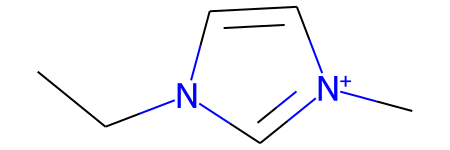

In [15]:
mol1 = Chem.MolFromSmiles('C[n+]1cc[n](CC)c1')
mol2 = Chem.MolFromSmiles('C[n]1cc[n+](CC)c1')
mol1

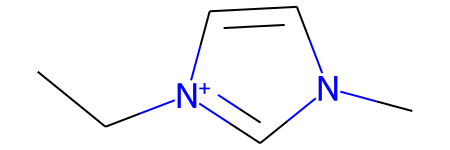

In [16]:
mol2

In [17]:
mol1.HasSubstructMatch(mol2)

False

Despite the fact that both molecules are equivalent, their graph representation is not, and current SMILES normalization (as implemented in RDKit) does not change that:

In [18]:
Chem.MolToSmiles(mol1), Chem.MolToSmiles(mol2)

('CCn1cc[n+](C)c1', 'CC[n+]1ccn(C)c1')

This problem can be adressed in two ways:

1. choosing SMARTS for the substructure search more accurately, e.g. ignoring atomic charges (see Daylight manuals on SMARTS for some ideas: [1](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html), [2](https://www.daylight.com/dayhtml_tutorials/languages/smarts/smarts_examples.html));

2. considering resonance via `ResonanceMolSupplier` class.